# Voltage Divider Analysis with SLiCAP

A comprehensive analysis of voltage divider circuits including:
- Basic voltage divider operation
- Transfer function derivation
- Parameter sweeps and visualization
- Design examples
- Loaded voltage divider

## Theory

A voltage divider consists of two resistors in series:

$$V_{out} = V_{in} \times \frac{R_2}{R_1 + R_2}$$

The transfer function is:

$$H = \frac{V_{out}}{V_{in}} = \frac{R_2}{R_1 + R_2}$$

## Setup

In [1]:
# Import libraries
from SLiCAP import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display, Markdown

# Configure matplotlib for inline display
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

# Initialize SLiCAP project
initProject("Voltage Divider Analysis")

print("✓ Setup complete")

Compiling library: SLiCAP.lib.
Compiling library: SLiCAPmodels.lib.
✓ Setup complete


## Part 1: Basic Voltage Divider Analysis

In [2]:
# Load the voltage divider circuit
cir = makeCircuit('voltage_divider.cir')

print("Circuit Information:")
print("="*60)
print(f"Title: {cir.title}")
print(f"Nodes: {cir.nodes}")
print(f"Elements: {list(cir.elements.keys())}")

# Display element details
print("\nElement Details:")
for elem_name, elem in cir.elements.items():
    print(f"  {elem_name}: nodes {elem.nodes}")

Checking netlist: cir/voltage_divider.cir
Circuit Information:
Title: Voltage Divider Circuit
Nodes: ['0', 'in', 'out']
Elements: ['V1', 'R1', 'R2']

Element Details:
  V1: nodes ['in', '0']
  R1: nodes ['in', 'out']
  R2: nodes ['out', '0']


Circuit Schematic:


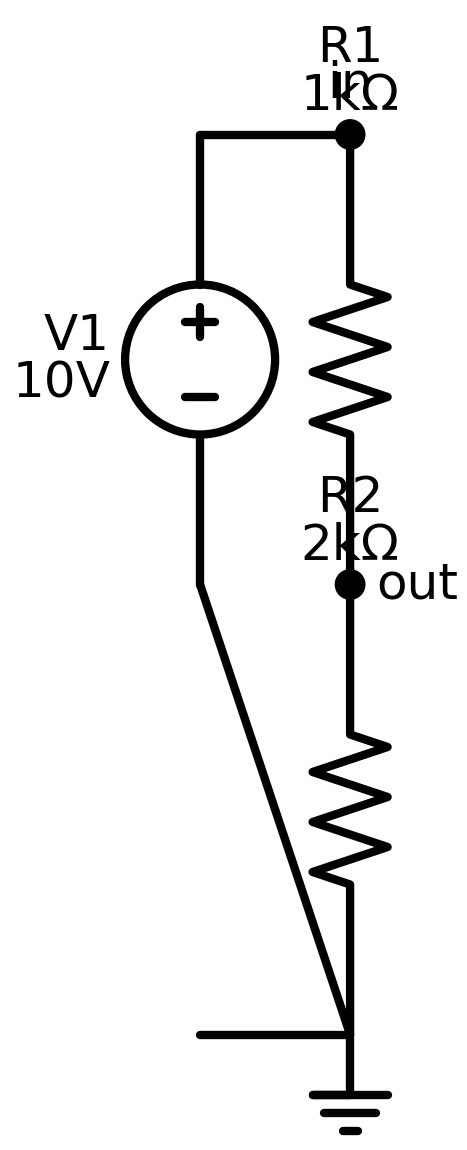

In [3]:
# Display the circuit schematic
print("Circuit Schematic:")
display(Image('img/voltage_divider_schematic.png', width=400))

In [4]:
# Define circuit parameters - Example 1
R1_val = 1000   # 1kΩ
R2_val = 2000   # 2kΩ
Vin_val = 10    # 10V

cir.defPar('R1', R1_val)
cir.defPar('R2', R2_val)
cir.defPar('V_in', Vin_val)

print("Circuit Parameters:")
print("="*60)
print(f"R1 = {R1_val} Ω = {R1_val/1000} kΩ")
print(f"R2 = {R2_val} Ω = {R2_val/1000} kΩ")
print(f"V_in = {Vin_val} V")

Circuit Parameters:
R1 = 1000 Ω = 1.0 kΩ
R2 = 2000 Ω = 2.0 kΩ
V_in = 10 V


In [5]:
# Perform symbolic analysis
result = doLaplace(cir, source='V1', detector='V_out')

print("Symbolic Transfer Function:")
print("="*60)
display(Markdown("## $H(s) = \\frac{V_{out}}{V_{in}}$"))
display(result.laplace)

print("\nNumerator:")
display(result.numer)

print("\nDenominator:")
display(result.denom)

Symbolic Transfer Function:


## $H(s) = \frac{V_{out}}{V_{in}}$

R2/(R1 + R2)


Numerator:


R2


Denominator:


R1 + R2

In [6]:
# Calculate output voltage
H = result.laplace

# Substitute parameter values
dc_gain = H.subs([('R1', R1_val), ('R2', R2_val)])
v_out = Vin_val * float(dc_gain)

print("Numerical Results:")
print("="*60)
print(f"DC Gain: {dc_gain} = {float(dc_gain):.4f}")
print(f"Output Voltage: V_out = {Vin_val} V × {float(dc_gain):.4f} = {v_out:.4f} V")

# Verify with formula
v_out_formula = Vin_val * R2_val / (R1_val + R2_val)
print(f"\nVerification (using formula):")
print(f"V_out = {Vin_val} × {R2_val}/({R1_val}+{R2_val}) = {v_out_formula:.4f} V")
print(f"Match: {abs(v_out - v_out_formula) < 0.001} ✓")

Numerical Results:
DC Gain: 2/3 = 0.6667
Output Voltage: V_out = 10 V × 0.6667 = 6.6667 V

Verification (using formula):
V_out = 10 × 2000/(1000+2000) = 6.6667 V
Match: True ✓


In [7]:
# Calculate additional parameters
R_total = R1_val + R2_val
I_total = Vin_val / R_total
P_R1 = I_total**2 * R1_val
P_R2 = I_total**2 * R2_val
P_total = P_R1 + P_R2

print("Additional Circuit Parameters:")
print("="*60)
print(f"Total Resistance: R_total = {R_total} Ω = {R_total/1000} kΩ")
print(f"Current: I = {I_total*1000:.4f} mA")
print(f"Power dissipation in R1: P_R1 = {P_R1*1000:.4f} mW")
print(f"Power dissipation in R2: P_R2 = {P_R2*1000:.4f} mW")
print(f"Total power: P_total = {P_total*1000:.4f} mW")

Additional Circuit Parameters:
Total Resistance: R_total = 3000 Ω = 3.0 kΩ
Current: I = 3.3333 mA
Power dissipation in R1: P_R1 = 11.1111 mW
Power dissipation in R2: P_R2 = 22.2222 mW
Total power: P_total = 33.3333 mW


## Part 2: Parametric Analysis - Varying R2

In [8]:
# Sweep R2 while keeping R1 constant
R1_fixed = 1000  # 1kΩ
R2_values = np.logspace(2, 4, 50)  # 100Ω to 10kΩ

print(f"Parameter Sweep: R2 from {R2_values[0]:.0f} Ω to {R2_values[-1]:.0f} Ω")
print(f"Fixed: R1 = {R1_fixed} Ω, V_in = 10 V")

# Calculate output voltage for each R2
v_out_sweep = []
gain_sweep = []

for R2 in R2_values:
    gain = R2 / (R1_fixed + R2)
    v_out = 10 * gain
    gain_sweep.append(gain)
    v_out_sweep.append(v_out)

v_out_sweep = np.array(v_out_sweep)
gain_sweep = np.array(gain_sweep)

print(f"✓ Calculated {len(R2_values)} points")

Parameter Sweep: R2 from 100 Ω to 10000 Ω
Fixed: R1 = 1000 Ω, V_in = 10 V
✓ Calculated 50 points


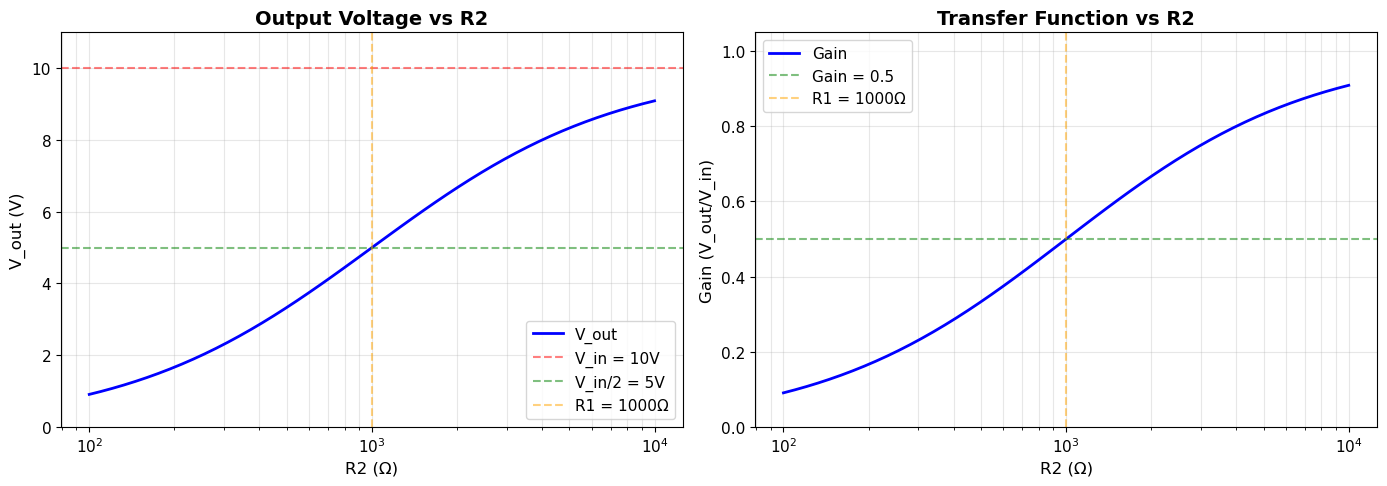


Observations:
- When R2 << R1: V_out ≈ 0 (most voltage dropped across R1)
- When R2 = R1: V_out = V_in/2 (equal voltage division)
- When R2 >> R1: V_out ≈ V_in (most voltage across R2)


In [9]:
# Plot results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Output voltage vs R2
ax1.semilogx(R2_values, v_out_sweep, 'b-', linewidth=2, label='V_out')
ax1.axhline(10, color='r', linestyle='--', alpha=0.5, label='V_in = 10V')
ax1.axhline(5, color='g', linestyle='--', alpha=0.5, label='V_in/2 = 5V')
ax1.axvline(R1_fixed, color='orange', linestyle='--', alpha=0.5, label=f'R1 = {R1_fixed}Ω')
ax1.grid(True, which='both', alpha=0.3)
ax1.set_xlabel('R2 (Ω)', fontsize=12)
ax1.set_ylabel('V_out (V)', fontsize=12)
ax1.set_title('Output Voltage vs R2', fontsize=14, fontweight='bold')
ax1.legend()
ax1.set_ylim(0, 11)

# Plot 2: Transfer function (gain) vs R2
ax2.semilogx(R2_values, gain_sweep, 'b-', linewidth=2, label='Gain')
ax2.axhline(0.5, color='g', linestyle='--', alpha=0.5, label='Gain = 0.5')
ax2.axvline(R1_fixed, color='orange', linestyle='--', alpha=0.5, label=f'R1 = {R1_fixed}Ω')
ax2.grid(True, which='both', alpha=0.3)
ax2.set_xlabel('R2 (Ω)', fontsize=12)
ax2.set_ylabel('Gain (V_out/V_in)', fontsize=12)
ax2.set_title('Transfer Function vs R2', fontsize=14, fontweight='bold')
ax2.legend()
ax2.set_ylim(0, 1.05)

plt.tight_layout()
plt.show()

print("\nObservations:")
print("- When R2 << R1: V_out ≈ 0 (most voltage dropped across R1)")
print("- When R2 = R1: V_out = V_in/2 (equal voltage division)")
print("- When R2 >> R1: V_out ≈ V_in (most voltage across R2)")

## Part 3: Ratio Analysis

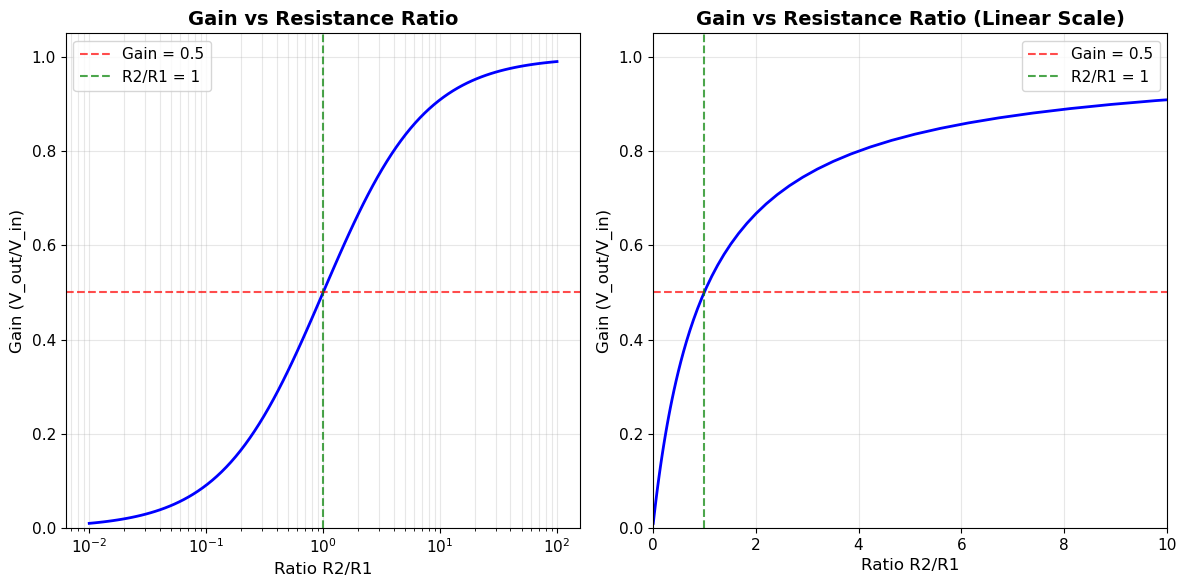

Key Points:
  R2/R1 = 0.1  → Gain = 0.091 (9% of input)
  R2/R1 = 1.0  → Gain = 0.500 (50% of input)
  R2/R1 = 9.0  → Gain = 0.900 (90% of input)


In [10]:
# Analyze output voltage as a function of resistance ratio
ratio = np.logspace(-2, 2, 100)  # R2/R1 from 0.01 to 100
gain_ratio = ratio / (1 + ratio)  # Derived from R2/(R1+R2)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.semilogx(ratio, gain_ratio, 'b-', linewidth=2)
plt.axhline(0.5, color='r', linestyle='--', alpha=0.7, label='Gain = 0.5')
plt.axvline(1.0, color='g', linestyle='--', alpha=0.7, label='R2/R1 = 1')
plt.grid(True, which='both', alpha=0.3)
plt.xlabel('Ratio R2/R1', fontsize=12)
plt.ylabel('Gain (V_out/V_in)', fontsize=12)
plt.title('Gain vs Resistance Ratio', fontsize=14, fontweight='bold')
plt.legend()
plt.ylim(0, 1.05)

plt.subplot(1, 2, 2)
plt.plot(ratio, gain_ratio, 'b-', linewidth=2)
plt.axhline(0.5, color='r', linestyle='--', alpha=0.7, label='Gain = 0.5')
plt.axvline(1.0, color='g', linestyle='--', alpha=0.7, label='R2/R1 = 1')
plt.grid(True, alpha=0.3)
plt.xlabel('Ratio R2/R1', fontsize=12)
plt.ylabel('Gain (V_out/V_in)', fontsize=12)
plt.title('Gain vs Resistance Ratio (Linear Scale)', fontsize=14, fontweight='bold')
plt.legend()
plt.xlim(0, 10)
plt.ylim(0, 1.05)

plt.tight_layout()
plt.show()

print("Key Points:")
print(f"  R2/R1 = 0.1  → Gain = {0.1/(1+0.1):.3f} (9% of input)")
print(f"  R2/R1 = 1.0  → Gain = {1.0/(1+1.0):.3f} (50% of input)")
print(f"  R2/R1 = 9.0  → Gain = {9.0/(1+9.0):.3f} (90% of input)")

## Part 4: Design Examples

Common voltage divider design scenarios.

In [11]:
def design_voltage_divider(V_in, V_out_desired, R1=None, R2=None):
    """
    Design a voltage divider given input voltage, desired output, and one resistor value.
    """
    gain = V_out_desired / V_in
    
    if R1 is not None:
        # Calculate R2
        R2_calc = R1 * gain / (1 - gain)
        return R1, R2_calc, gain
    elif R2 is not None:
        # Calculate R1
        R1_calc = R2 * (1 - gain) / gain
        return R1_calc, R2, gain
    else:
        print("Error: Must specify either R1 or R2")
        return None

# Example 1: Divide 12V to 5V using R1=1kΩ
print("Design Example 1: 12V → 5V")
print("="*60)
R1, R2, gain = design_voltage_divider(12, 5, R1=1000)
print(f"Given: V_in = 12V, V_out = 5V, R1 = {R1}Ω")
print(f"Required gain: {gain:.4f}")
print(f"Calculated: R2 = {R2:.2f} Ω")
print(f"Standard value: R2 ≈ {round(R2/100)*100} Ω")
print(f"Actual V_out = {12 * round(R2/100)*100 / (1000 + round(R2/100)*100):.3f} V")

print("\nDesign Example 2: 5V → 3.3V")
print("="*60)
R1, R2, gain = design_voltage_divider(5, 3.3, R2=2000)
print(f"Given: V_in = 5V, V_out = 3.3V, R2 = {R2}Ω")
print(f"Required gain: {gain:.4f}")
print(f"Calculated: R1 = {R1:.2f} Ω")
print(f"Standard value: R1 ≈ {round(R1/100)*100} Ω")
print(f"Actual V_out = {5 * 2000 / (round(R1/100)*100 + 2000):.3f} V")

Design Example 1: 12V → 5V
Given: V_in = 12V, V_out = 5V, R1 = 1000Ω
Required gain: 0.4167
Calculated: R2 = 714.29 Ω
Standard value: R2 ≈ 700 Ω
Actual V_out = 4.941 V

Design Example 2: 5V → 3.3V
Given: V_in = 5V, V_out = 3.3V, R2 = 2000Ω
Required gain: 0.6600
Calculated: R1 = 1030.30 Ω
Standard value: R1 ≈ 1000 Ω
Actual V_out = 3.333 V


## Part 5: Multiple Input Voltages

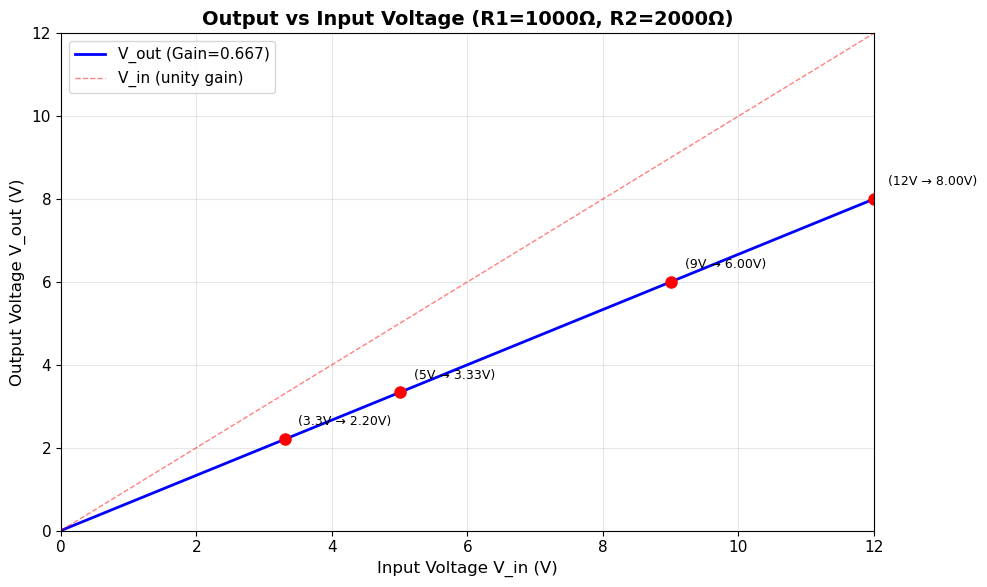

Linear relationship: V_out = 0.6667 × V_in

For R1 = 1000Ω, R2 = 2000Ω:
   3.3V input →  2.20V output
   5.0V input →  3.33V output
   9.0V input →  6.00V output
  12.0V input →  8.00V output


In [12]:
# Analyze the same divider with different input voltages
R1_design = 1000
R2_design = 2000
V_in_values = np.linspace(0, 12, 50)

gain_fixed = R2_design / (R1_design + R2_design)
V_out_values = V_in_values * gain_fixed

plt.figure(figsize=(10, 6))
plt.plot(V_in_values, V_out_values, 'b-', linewidth=2, label=f'V_out (Gain={gain_fixed:.3f})')
plt.plot(V_in_values, V_in_values, 'r--', linewidth=1, alpha=0.5, label='V_in (unity gain)')
plt.grid(True, alpha=0.3)
plt.xlabel('Input Voltage V_in (V)', fontsize=12)
plt.ylabel('Output Voltage V_out (V)', fontsize=12)
plt.title(f'Output vs Input Voltage (R1={R1_design}Ω, R2={R2_design}Ω)', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.xlim(0, 12)
plt.ylim(0, 12)

# Add some example points
test_voltages = [3.3, 5, 9, 12]
for v_in in test_voltages:
    v_out = v_in * gain_fixed
    plt.plot(v_in, v_out, 'ro', markersize=8)
    plt.annotate(f'({v_in}V → {v_out:.2f}V)', xy=(v_in, v_out), 
                xytext=(10, 10), textcoords='offset points', fontsize=9)

plt.tight_layout()
plt.show()

print(f"Linear relationship: V_out = {gain_fixed:.4f} × V_in")
print(f"\nFor R1 = {R1_design}Ω, R2 = {R2_design}Ω:")
for v_in in test_voltages:
    v_out = v_in * gain_fixed
    print(f"  {v_in:4.1f}V input → {v_out:5.2f}V output")

## Part 6: Power Dissipation Analysis

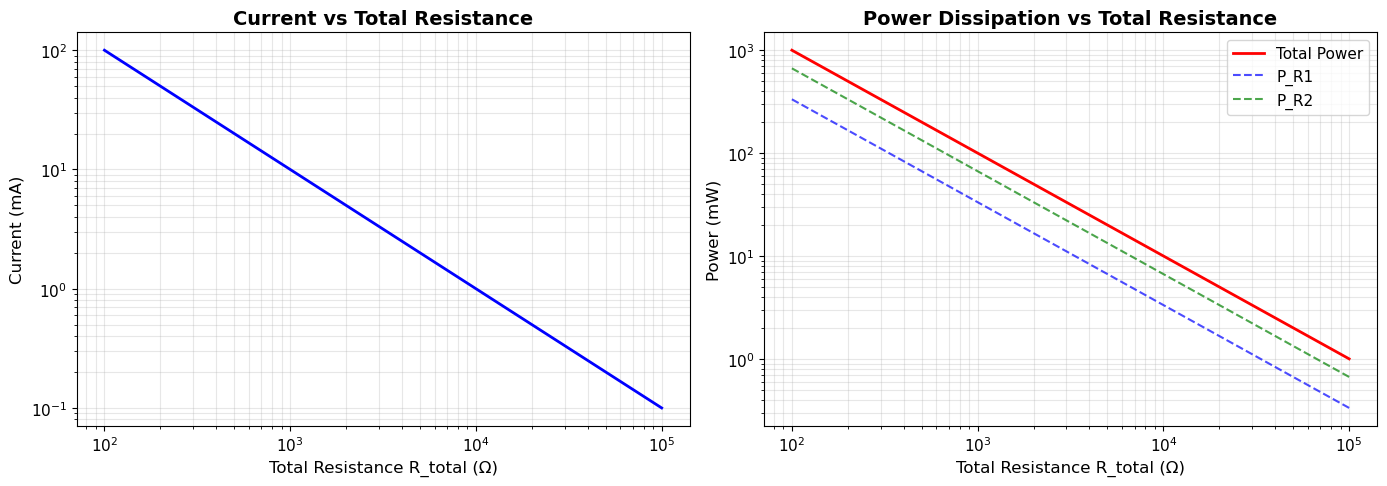

Power Design Considerations:
For V_in = 10V, maintaining R2/R1 = 2:
  R_total =   300Ω → I =  33.33mA, P = 333.33mW
  R_total =  3000Ω → I =   3.33mA, P =  33.33mW
  R_total = 30000Ω → I =   0.33mA, P =   3.33mW

Note: Higher resistance → Lower power consumption
      But may be more susceptible to loading effects


In [13]:
# Analyze power dissipation for different resistor values
V_in_power = 10  # Fixed input voltage
R_total_values = np.logspace(2, 5, 50)  # Total resistance from 100Ω to 100kΩ

# Keep ratio constant (R2/R1 = 2) while varying total resistance
R1_power = R_total_values / 3
R2_power = 2 * R_total_values / 3

# Calculate current and power
I_current = V_in_power / R_total_values
P_total_power = V_in_power * I_current
P_R1_power = I_current**2 * R1_power
P_R2_power = I_current**2 * R2_power

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Current vs Total Resistance
ax1.loglog(R_total_values, I_current*1000, 'b-', linewidth=2)
ax1.grid(True, which='both', alpha=0.3)
ax1.set_xlabel('Total Resistance R_total (Ω)', fontsize=12)
ax1.set_ylabel('Current (mA)', fontsize=12)
ax1.set_title('Current vs Total Resistance', fontsize=14, fontweight='bold')

# Plot 2: Power dissipation
ax2.loglog(R_total_values, P_total_power*1000, 'r-', linewidth=2, label='Total Power')
ax2.loglog(R_total_values, P_R1_power*1000, 'b--', linewidth=1.5, label='P_R1', alpha=0.7)
ax2.loglog(R_total_values, P_R2_power*1000, 'g--', linewidth=1.5, label='P_R2', alpha=0.7)
ax2.grid(True, which='both', alpha=0.3)
ax2.set_xlabel('Total Resistance R_total (Ω)', fontsize=12)
ax2.set_ylabel('Power (mW)', fontsize=12)
ax2.set_title('Power Dissipation vs Total Resistance', fontsize=14, fontweight='bold')
ax2.legend()

plt.tight_layout()
plt.show()

print("Power Design Considerations:")
print("="*60)
print("For V_in = 10V, maintaining R2/R1 = 2:")
for R_tot in [300, 3000, 30000]:
    I = V_in_power / R_tot
    P = V_in_power * I
    print(f"  R_total = {R_tot:5d}Ω → I = {I*1000:6.2f}mA, P = {P*1000:6.2f}mW")

print("\nNote: Higher resistance → Lower power consumption")
print("      But may be more susceptible to loading effects")

## Part 7: Comparison Table

In [14]:
# Create comparison table for common configurations
import pandas as pd

configurations = [
    {'R1': 1000, 'R2': 1000, 'V_in': 10},
    {'R1': 1000, 'R2': 2000, 'V_in': 10},
    {'R1': 2000, 'R2': 1000, 'V_in': 10},
    {'R1': 1000, 'R2': 9000, 'V_in': 10},
    {'R1': 1000, 'R2': 1000, 'V_in': 5},
    {'R1': 1000, 'R2': 2000, 'V_in': 12},
]

results = []
for config in configurations:
    R1, R2, V_in = config['R1'], config['R2'], config['V_in']
    gain = R2 / (R1 + R2)
    V_out = V_in * gain
    I = V_in / (R1 + R2)
    P = V_in * I
    
    results.append({
        'R1 (Ω)': R1,
        'R2 (Ω)': R2,
        'V_in (V)': V_in,
        'Gain': f"{gain:.3f}",
        'V_out (V)': f"{V_out:.3f}",
        'I (mA)': f"{I*1000:.3f}",
        'P (mW)': f"{P*1000:.2f}"
    })

df = pd.DataFrame(results)
print("\nVoltage Divider Configuration Comparison:")
print("="*80)
print(df.to_string(index=False))

display(df)


Voltage Divider Configuration Comparison:
 R1 (Ω)  R2 (Ω)  V_in (V)  Gain V_out (V) I (mA) P (mW)
   1000    1000        10 0.500     5.000  5.000  50.00
   1000    2000        10 0.667     6.667  3.333  33.33
   2000    1000        10 0.333     3.333  3.333  33.33
   1000    9000        10 0.900     9.000  1.000  10.00
   1000    1000         5 0.500     2.500  2.500  12.50
   1000    2000        12 0.667     8.000  4.000  48.00


,R1 (Ω),R2 (Ω),V_in (V),Gain,V_out (V),I (mA),P (mW)
0,1000,1000,10,0.500,5.000,5.000,50.00
1,1000,2000,10,0.667,6.667,3.333,33.33
2,2000,1000,10,0.333,3.333,3.333,33.33
3,1000,9000,10,0.900,9.000,1.000,10.00
4,1000,1000,5,0.500,2.500,2.500,12.50
5,1000,2000,12,0.667,8.000,4.000,48.00


## Summary

This notebook demonstrated:

1. **Basic Analysis**: Transfer function, output voltage calculation
2. **Parametric Sweeps**: Effect of varying R2 on output
3. **Ratio Analysis**: Relationship between R2/R1 and gain
4. **Design Examples**: Calculating resistor values for desired output
5. **Input Voltage Sweep**: Linear relationship between input and output
6. **Power Analysis**: Trade-offs in resistor selection
7. **Comparison Table**: Quick reference for common configurations

### Key Takeaways

- **Formula**: $V_{out} = V_{in} \times \frac{R_2}{R_1 + R_2}$
- **Linearity**: Output is linearly proportional to input
- **Ratio Matters**: Only the ratio R2/R1 determines the gain
- **Power Trade-off**: Higher resistance = lower power but higher sensitivity to loading
- **Design Rule**: Choose resistor values based on power budget and load requirements

### When to Use Voltage Dividers

✅ **Good for:**
- Reducing voltage for measurements
- Biasing circuits
- Level shifting
- Low-power applications with high-impedance loads

❌ **Not suitable for:**
- Driving heavy loads (use voltage regulator instead)
- Precision voltage references (use dedicated reference IC)
- High-power applications (inefficient)